# Simple Linear Regression

1. Reading and Understanding the data
2. Training the model (Perform Single Linear Regression)
3. Evaluate the model
4. Predicting

## Reading and Understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#sklearn
from sklearn.linear_model import LinearRegression

In [2]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Visualising the data

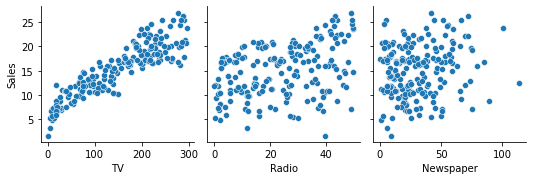

In [6]:
sns.pairplot(data = advertising, x_vars = [ 'TV', 'Radio', 'Newspaper'], y_vars = 'Sales')
plt.show()

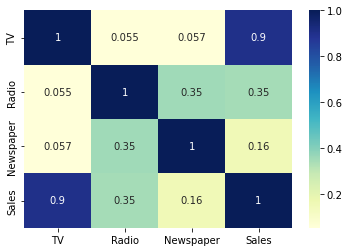

In [7]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot=True)
plt.show()

TV is more effecitve variable related to Sales compared to Radio & News paper.

# Perform Single Linear Regression

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

In [8]:
X = advertising['TV']
y = advertising['Sales']

Train-Test Split

We need to split the dataset as training set and test set which is 70-30%.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.3, random_state = 100) 

In [10]:
X_train_sm = sm.add_constant(X_train)

In [11]:
lr = sm.OLS(y_train, X_train_sm)   #OLS: Ordinary Least Square method
lr_model = lr.fit()

In [12]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.52e-52
Time:                        07:25:05   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y_train_predict = lr_model.predict(X_train_sm)

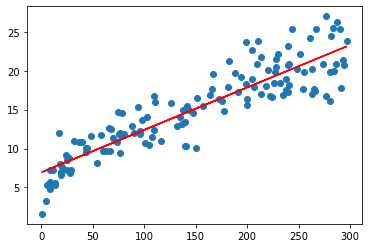

In [14]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_predict, 'r')
plt.show()

## Residual Analysis

In [15]:
#error = f(y_train, y_train_predict)

In [16]:
res = y_train - y_train_predict

<Figure size 432x288 with 0 Axes>

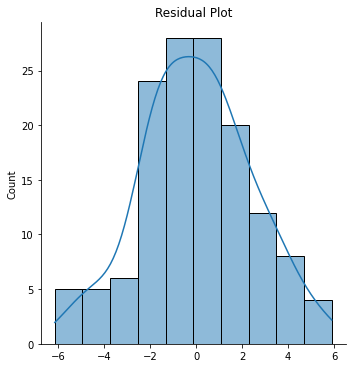

In [17]:
plt.figure()
sns.displot(res, kde=True)
plt.title('Residual Plot')
plt.show()

### error (residuals) is normal distributed

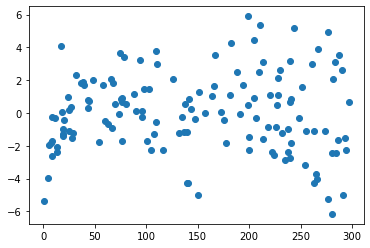

In [18]:
# look for patterns in the residuals

plt.scatter(X_train, res)
plt.show()

### there is no pattern observed in error (residuals)

# Predictions and Evaluate the Test set

In [19]:
# predicting on test set
# evaluate the model, r-squared, on the test set

In [20]:
X_test_sm = sm.add_constant(X_test)

#predicting on test set
y_test_predict = lr_model.predict(X_test_sm)

In [21]:
# Evaluate the model, r-squared, on the test set 
r2_test = r2_score(y_true = y_test, y_pred = y_test_predict)
r2_test

0.7921031601245658

In [22]:
r2_train = r2_score(y_true = y_train, y_pred = y_train_predict)
r2_train

0.8157933136480389

In [23]:
mean_squared_error(y_true = y_test, y_pred = y_test_predict)

4.077556371826956

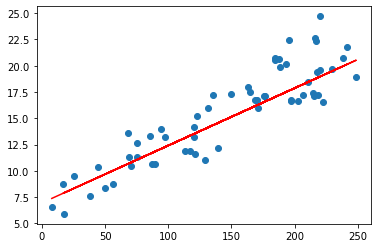

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_predict, "r")
plt.show()

# Linear Regressiong using 'SKLearn'

In [25]:
# 1. Create the object of linear regression
# 2. Fit the model
# 3. see the params, make predictions (train, test)
# 4. Evaluate the model

In [26]:
X_train.shape

#reshape the X_train to (140, 1)
X_train_lm = X_train.values.reshape(-1, 1)
X_train_lm.shape

X_test.shape
#reshape the X_test to (60, 1)
X_test_lm = X_test.values.reshape(-1, 1)
X_test_lm.shape

(60, 1)

In [27]:
#create the object on linear regression
lm = LinearRegression()

# fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [28]:
#help(lm)
# see the params and make predictions
print(lm.coef_)
print(lm.intercept_)

y_train_predict2 = lm.predict(X_train_lm)
y_test_predict2 = lm.predict(X_test_lm)

[0.05454575]
6.948683200001357


In [30]:
print(r2_score(y_true = y_train, y_pred = y_train_predict2))
print(r2_score(y_true = y_test, y_pred = y_test_predict2))

0.8157933136480389
0.7921031601245662
